In [2]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#The dataset contains no header for columns, hence the header parameter
abnormal=pd.read_csv('./ptbdb_abnormal.csv',header=None)
normal=pd.read_csv('./ptbdb_normal.csv',header=None)

In [4]:
data = pd.concat([abnormal, normal]).sample(frac=1).reset_index(drop=True)

In [5]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-2]]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape)

(3638, 186)


In [7]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,186,1])

In [8]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,186,1])

In [9]:
model=tf.keras.Sequential([
    layers.Conv1D(7, 7, activation='relu', input_shape=(186,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid') #softmax cuz categories
])

In [10]:
model.compile('adam',tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=128,epochs=200,verbose=True,validation_split=0.2)

Epoch 1/200
23/23 [==============================] - 3s 46ms/step - loss: 0.5097 - accuracy: 0.7361 - val_loss: 0.6509 - val_accuracy: 0.7198
Epoch 2/200
23/23 [==============================] - 0s 22ms/step - loss: 0.4134 - accuracy: 0.7962 - val_loss: 0.6344 - val_accuracy: 0.7198
Epoch 3/200
23/23 [==============================] - 0s 19ms/step - loss: 0.3596 - accuracy: 0.8357 - val_loss: 0.6172 - val_accuracy: 0.7225
Epoch 4/200
23/23 [==============================] - 0s 20ms/step - loss: 0.3260 - accuracy: 0.8564 - val_loss: 0.6045 - val_accuracy: 0.7390
Epoch 5/200
23/23 [==============================] - 0s 20ms/step - loss: 0.2980 - accuracy: 0.8766 - val_loss: 0.6108 - val_accuracy: 0.7940
Epoch 6/200
23/23 [==============================] - 0s 22ms/step - loss: 0.2699 - accuracy: 0.8904 - val_loss: 0.6316 - val_accuracy: 0.6703
Epoch 7/200
23/23 [==============================] - 0s 18ms/step - loss: 0.2393 - accuracy: 0.9086 - val_loss: 0.6634 - val_accuracy: 0.5577
Epoch 

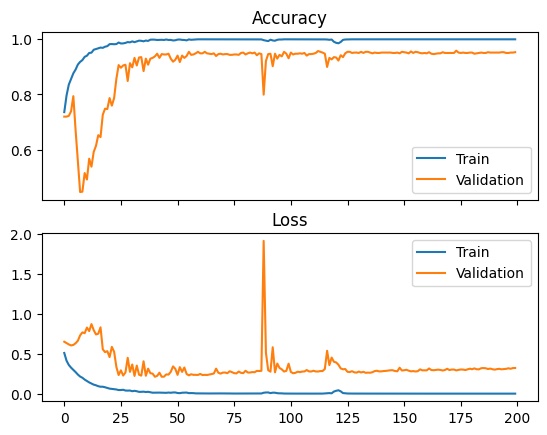

In [11]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [12]:
model.evaluate(x_test, y_test, verbose=True)

342/342 [==============================] - 1s 4ms/step - loss: 0.2270 - accuracy: 0.9596


[0.22696518898010254, 0.9595931768417358]